In [1]:
import numpy as np                     #for working with array of numbers 
import pandas as pd                    #for manipulating datasets
import matplotlib.pyplot as plt       #library for plotting graphs in machine learning models
import seaborn as sns                 #for plotting graphs in machine learning models
%matplotlib inline
import warnings                      #for warnings in machine learning models
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('online_retail.csv')  #load the dataset as Data
df.info()                              #return the dataset information
df.isnull().sum()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


index               0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [3]:
df.shape

(541909, 9)

In [4]:
df.describe()

,index,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000,406829.000000
mean,270954.000000,9.552250,4.611114,15287.690570
std,156435.797851,218.081158,96.759853,1713.600303
min,0.000000,-80995.000000,-11062.060000,12346.000000
25%,135477.000000,1.000000,1.250000,13953.000000
50%,270954.000000,3.000000,2.080000,15152.000000
75%,406431.000000,10.000000,4.130000,16791.000000
max,541908.000000,80995.000000,38970.000000,18287.000000


In [5]:
df.isna().sum()

index               0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(columns=['index'],inplace=True)

In [8]:
len(df['Description'].unique())

4224

## EXPLORALOTRY DATA ANALYSIS BELOW

In [9]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
Most_buyed_product=df.groupby(by='Description').agg({'Quantity':'sum'}).sort_values(by='Quantity',ascending=False).reset_index().head(15)
Most_buyed_product

,Description,Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
1,JUMBO BAG RED RETROSPOT,47363
2,ASSORTED COLOUR BIRD ORNAMENT,36381
3,POPCORN HOLDER,36334
4,PACK OF 72 RETROSPOT CAKE CASES,36039
5,WHITE HANGING HEART T-LIGHT HOLDER,35317
6,RABBIT NIGHT LIGHT,30680
7,MINI PAINT SET VINTAGE,26437
8,PACK OF 12 LONDON TISSUES,26315
9,PACK OF 60 PINK PAISLEY CAKE CASES,24753


In [11]:
import plotly.express as px
fig=px.bar(Most_buyed_product,x='Description',y='Quantity',title='Top 15 Most Buyed Product')
fig

Text(0.5, 1.0, 'Description')

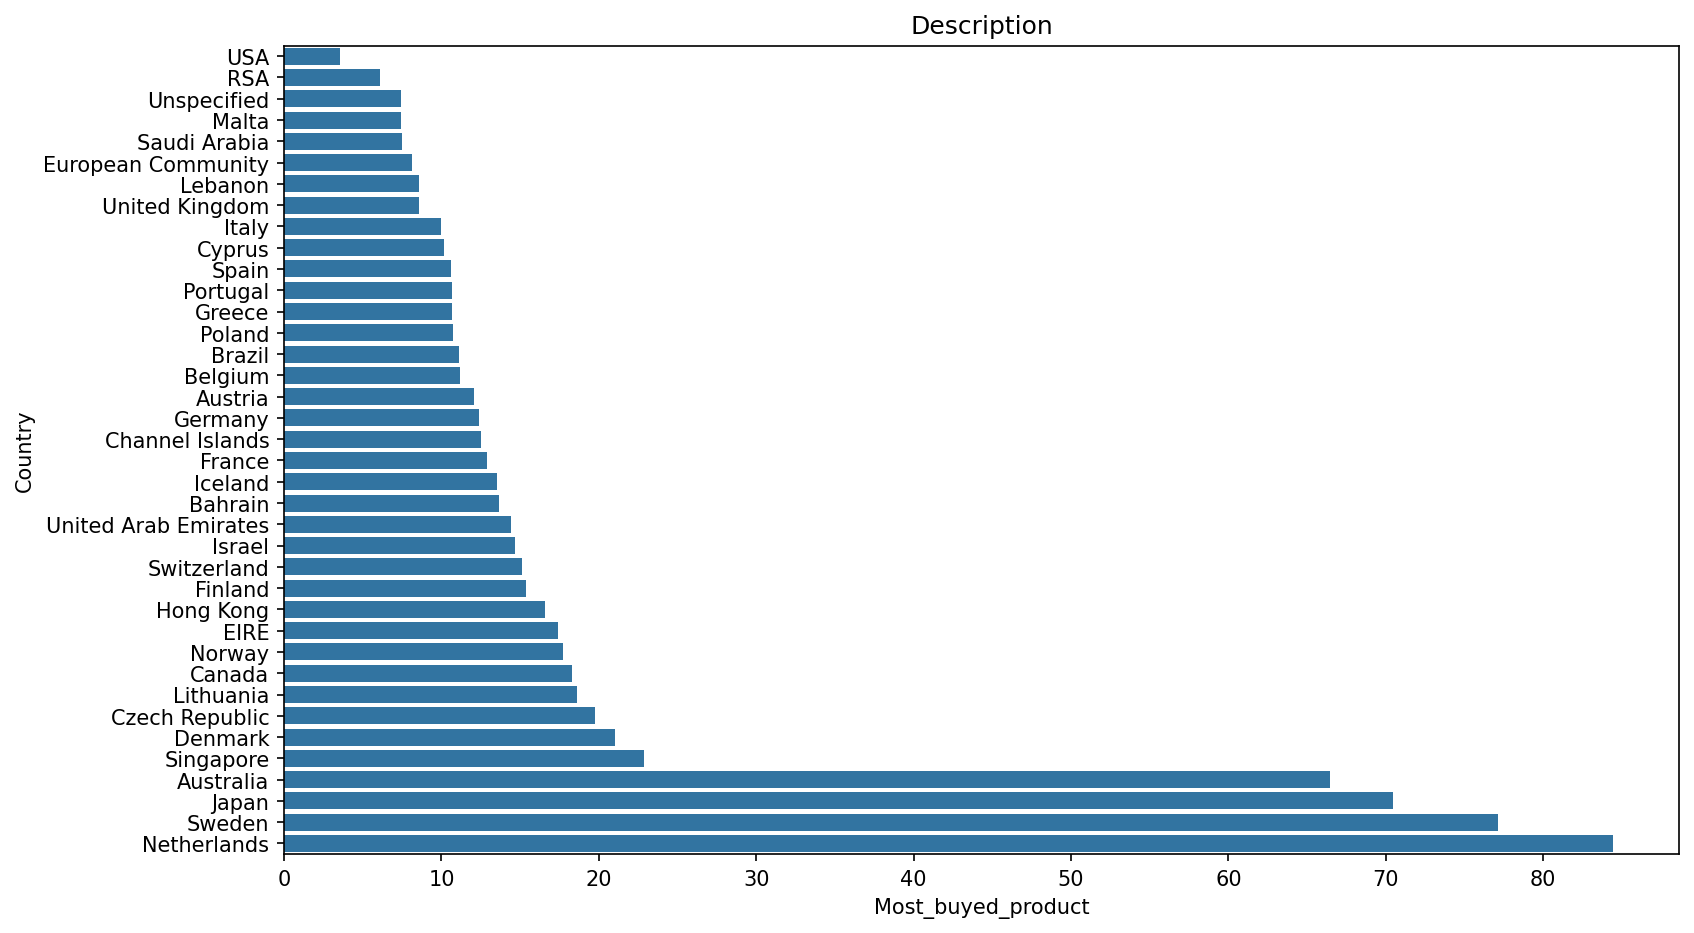

In [12]:
# Average Sales per Country
Most_buyed_product = df.groupby("Country")["Quantity"].mean().sort_values()

plt.figure(figsize = (12, 7), dpi = 150)
sns.barplot(x = Most_buyed_product.values, y = Most_buyed_product.index)
plt.xlabel("Most_buyed_product")
plt.ylabel("Country")
plt.title("Description")

In [13]:
top_products_countrywise=df.groupby(['Country','Description']).agg({'Quantity':'sum'}).reset_index()
top_products_countrywise

,Country,Description,Quantity
0,Australia,DOLLY GIRL BEAKER,200
1,Australia,I LOVE LONDON MINI BACKPACK,4
2,Australia,10 COLOUR SPACEBOY PEN,48
3,Australia,12 PENCIL SMALL TUBE WOODLAND,384
4,Australia,12 PENCILS TALL TUBE POSY,252
...,...,...,...
20171,Unspecified,WRAP POPPIES DESIGN,25
20172,Unspecified,WRAP SUKI AND FRIENDS,25
20173,Unspecified,WRAP VINTAGE PETALS DESIGN,25
20174,Unspecified,WRAP WEDDING DAY,25


In [14]:
countries=list(df['Country'].unique())
countries

['United Kingdom',
 'France',
 'Australia',
 'Netherlands',
 'Germany',
 'Norway',
 'EIRE',
 'Switzerland',
 'Spain',
 'Poland',
 'Portugal',
 'Italy',
 'Belgium',
 'Lithuania',
 'Japan',
 'Iceland',
 'Channel Islands',
 'Denmark',
 'Cyprus',
 'Sweden',
 'Austria',
 'Israel',
 'Finland',
 'Bahrain',
 'Greece',
 'Hong Kong',
 'Singapore',
 'Lebanon',
 'United Arab Emirates',
 'Saudi Arabia',
 'Czech Republic',
 'Canada',
 'Unspecified',
 'Brazil',
 'USA',
 'European Community',
 'Malta',
 'RSA']

In [15]:
from wordcloud import WordCloud

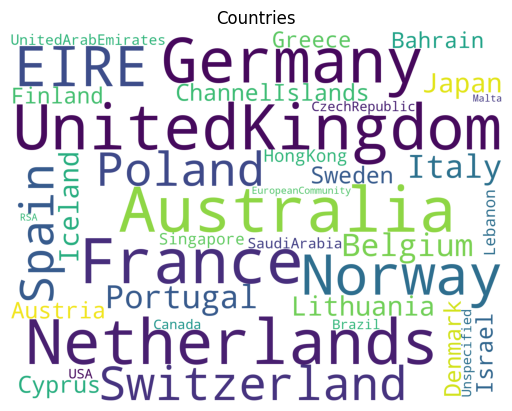

In [16]:
text=[]
for i in countries:
    i=i.replace(' ','')
    text.append(i)
text=','.join(text)
wordcloud=WordCloud(width=1600,height=1200 , background_color='white').generate(text)
plt.title('Countries')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Quarterly Sales below

Text(0.5, 1.0, 'Quarterly Sales')

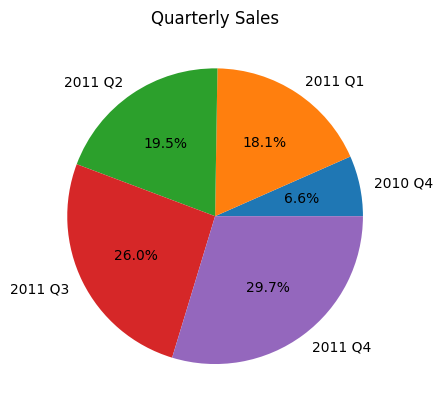

In [17]:
df["Quarterly"] = pd.PeriodIndex(df["InvoiceDate"], freq= 'Q')
quarterly_sales = df.groupby("Quarterly")["Quantity"].sum()

plt.figure(dpi = 100)
plt.pie(quarterly_sales, labels = ["2010 Q4", "2011 Q1", "2011 Q2", "2011 Q3", "2011 Q4"], autopct = "%1.1f%%")
plt.title("Quarterly Sales")

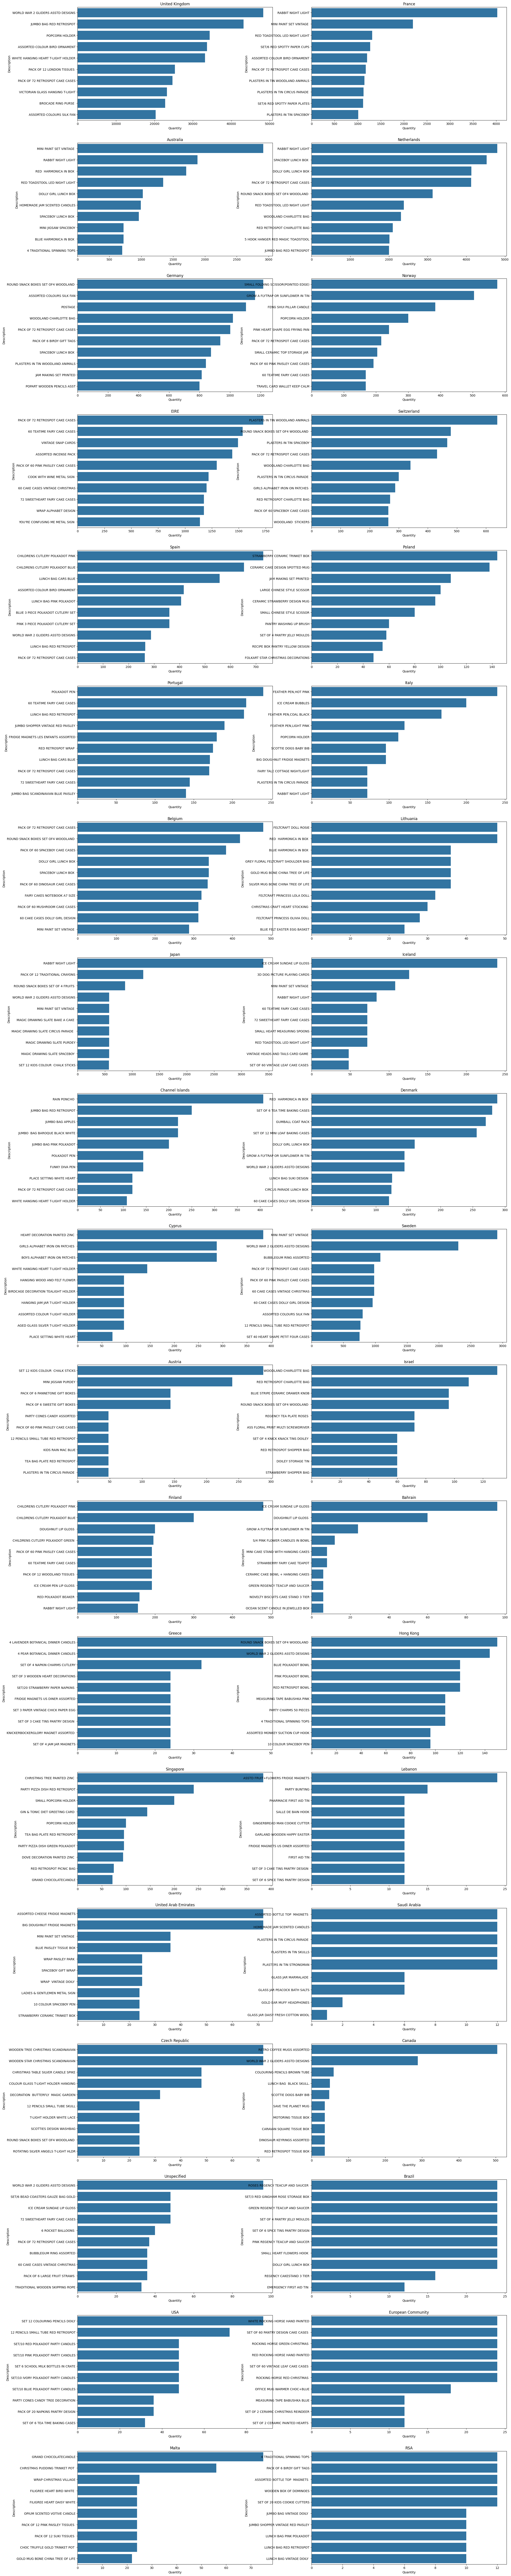

In [18]:
fig, axes=plt.subplots(nrows=19,ncols=2 ,figsize=(25,150))
Top_Products_Countrywise=pd.DataFrame(columns=['country','Top_Product'])
for i,country in enumerate(countries):
    row=i//2
    col=i%2
    temp_df=top_products_countrywise[top_products_countrywise['Country']==country].sort_values(by='Quantity',ascending=False).head(10)
    Top_Products_Countrywise=pd.concat([Top_Products_Countrywise, pd.DataFrame({'country': [country], 'Top_Product': [temp_df.head(1)['Description'].values[0]]})], ignore_index=True)
    sns.barplot(temp_df,x='Quantity',y='Description',ax=axes[row,col])
    axes[row,col].set_title(country)

## Top Product For Each Country

In [19]:
Top_Products_Countrywise

,country,Top_Product
0,United Kingdom,WORLD WAR 2 GLIDERS ASSTD DESIGNS
1,France,RABBIT NIGHT LIGHT
2,Australia,MINI PAINT SET VINTAGE
3,Netherlands,RABBIT NIGHT LIGHT
4,Germany,ROUND SNACK BOXES SET OF4 WOODLAND
5,Norway,SMALL FOLDING SCISSOR(POINTED EDGE)
6,EIRE,PACK OF 72 RETROSPOT CAKE CASES
7,Switzerland,PLASTERS IN TIN WOODLAND ANIMALS
8,Spain,CHILDRENS CUTLERY POLKADOT PINK
9,Poland,STRAWBERRY CERAMIC TRINKET BOX


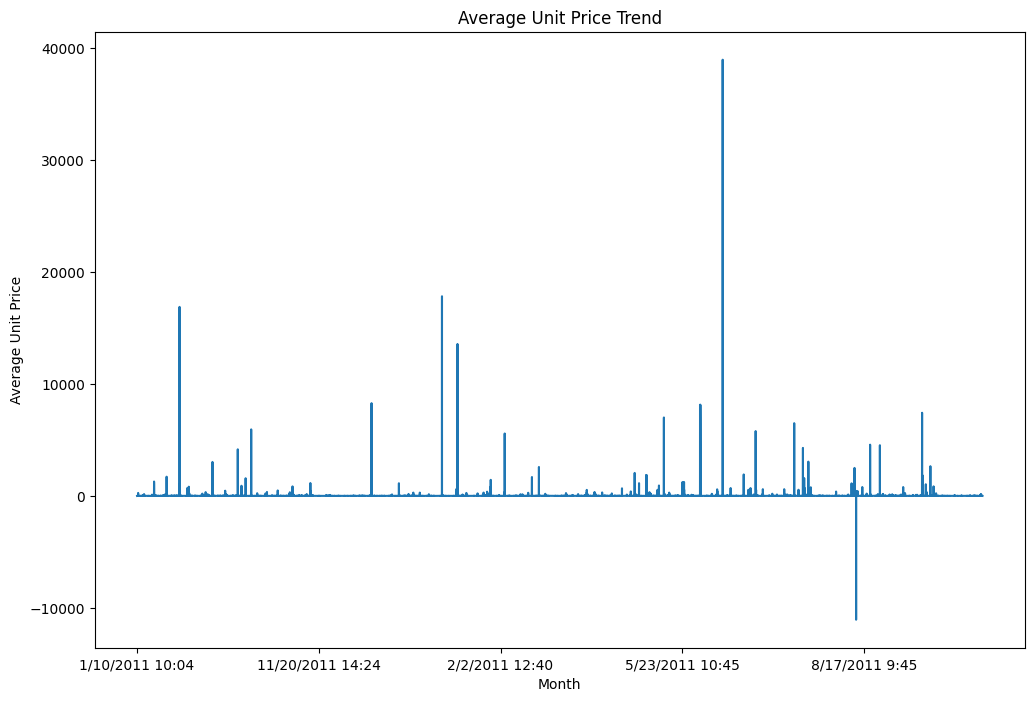

In [20]:
df.groupby('InvoiceDate')['UnitPrice'].mean().plot(figsize=(12, 8))
plt.xlabel('Month')
plt.ylabel('Average Unit Price')
plt.title('Average Unit Price Trend')
plt.show()

## Top Product For Each Year

In [21]:
from datetime import datetime

In [22]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['Invoice_year']=df['InvoiceDate'].dt.year
df['Invoice_month']=df['InvoiceDate'].dt.month
df['Invoice_hour']=df['InvoiceDate'].dt.hour

In [23]:
df.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Quarterly,Invoice_year,Invoice_month,Invoice_hour
21225,538071,84228,HEN HOUSE W CHICK STANDING,1,2010-12-09 14:09:00,0.84,NaN,United Kingdom,2010Q4,2010,12,14
524400,580550,22757,LARGE RED BABUSHKA NOTEBOOK,12,2011-12-05 10:00:00,0.39,13126.0,United Kingdom,2011Q4,2011,12,10
157092,550191,22178,VICTORIAN GLASS HANGING T-LIGHT,6,2011-04-14 19:59:00,1.25,16806.0,United Kingdom,2011Q2,2011,4,19


In [24]:
df['Invoice_year'].unique()

array([2010, 2011])

In [25]:
year_2010_df=df[df['Invoice_year']==2010]
year_2010_df=year_2010_df.groupby(by='Description').agg({'Quantity':'sum'}).reset_index().sort_values(by='Quantity',ascending=False)
year_2010_df

,Description,Quantity
2710,WORLD WAR 2 GLIDERS ASSTD DESIGNS,5195
1677,PACK OF 72 RETROSPOT CAKE CASES,4076
1166,HAND WARMER BABUSHKA DESIGN,3382
2649,WHITE HANGING HEART T-LIGHT HOLDER,3343
2386,SMALL POPCORN HOLDER,2731
...,...,...
2758,damages,-43
2757,check,-55
485,CARD HOLDER GINGHAM HEART,-99
810,Dotcom sales,-200


In [26]:
year_2011_df=df[df['Invoice_year']==2011]
year_2011_df=year_2011_df.groupby(by='Description').agg({'Quantity':'sum'}).reset_index().sort_values(by='Quantity',ascending=False)
year_2011_df

,Description,Quantity
3906,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48652
1807,JUMBO BAG RED RETROSPOT,45237
2662,POPCORN HOLDER,36334
239,ASSORTED COLOUR BIRD ORNAMENT,34010
3816,WHITE HANGING HEART T-LIGHT HOLDER,31974
...,...,...
1087,Damaged,-7540
2715,Printing smudges/thrown away,-9058
4009,check,-11975
3646,"Unsaleable, destroyed.",-15644


Text(0.5, 1.0, 'YEAR 2011')

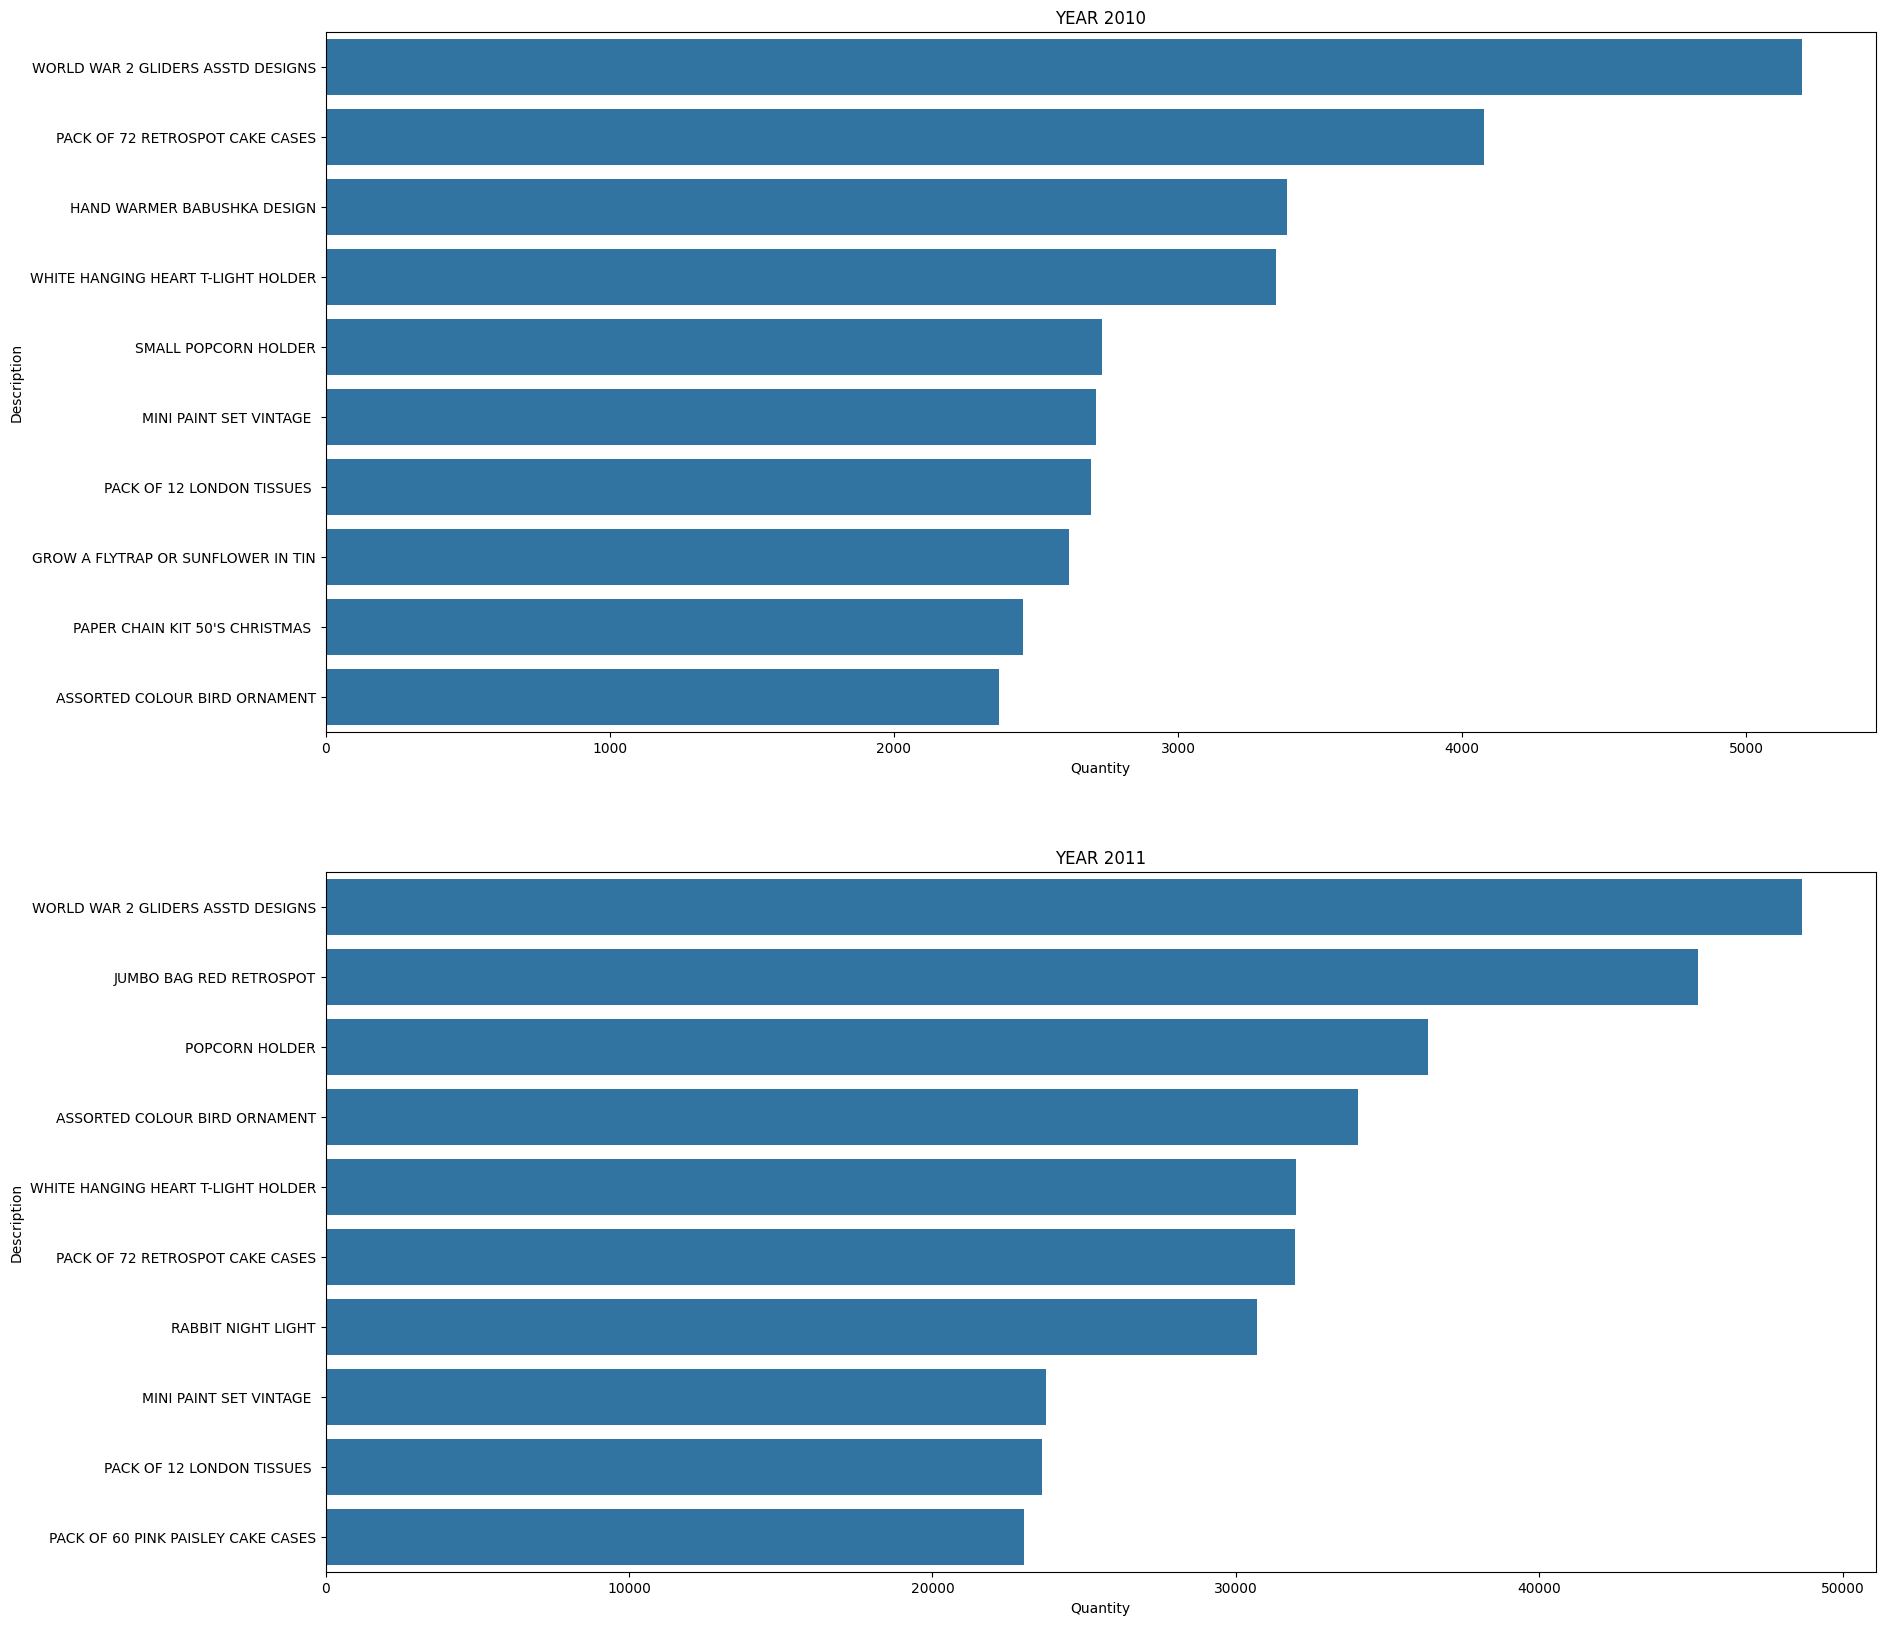

In [27]:
fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(20,20))
sns.barplot(year_2010_df.head(10),x='Quantity',y='Description',ax=axes[0])
axes[0].set_title('YEAR 2010')
sns.barplot(year_2011_df.head(10),x='Quantity',y='Description',ax=axes[1])
axes[1].set_title('YEAR 2011')

## Monthly Top Product

In [28]:
top_products_monthly=df.groupby(by=['Invoice_month','Description']).agg({'Quantity':'sum'}).reset_index()
top_products_monthly

,Invoice_month,Description,Quantity
0,1,4 PURPLE FLOCK DINNER CANDLES,2
1,1,OVAL WALL MIRROR DIAMANTE,23
2,1,SET 2 TEA TOWELS I LOVE LONDON,430
3,1,10 COLOUR SPACEBOY PEN,236
4,1,12 COLOURED PARTY BALLOONS,80
...,...,...,...
32449,12,missing,-338
32450,12,mixed up,-424
32451,12,smashed,-235
32452,12,wet,-48


In [29]:
top_products_monthly[top_products_monthly['Invoice_month']==1].sort_values(by='Quantity',ascending=False).head(10)

,Invoice_month,Description,Quantity
2450,1,WHITE HANGING HEART T-LIGHT HOLDER,5530
1532,1,PACK OF 72 RETROSPOT CAKE CASES,3409
789,1,FAIRY CAKE FLANNEL ASSORTED COLOUR,3246
372,1,BROCADE RING PURSE,3181
1100,1,HEART OF WICKER SMALL,2919
1186,1,JUMBO BAG RED RETROSPOT,2639
946,1,GIN + TONIC DIET METAL SIGN,2410
509,1,CHINESE DRAGON PAPER LANTERNS,2128
1380,1,MINI PAINT SET VINTAGE,1913
2195,1,SMALL POPCORN HOLDER,1809


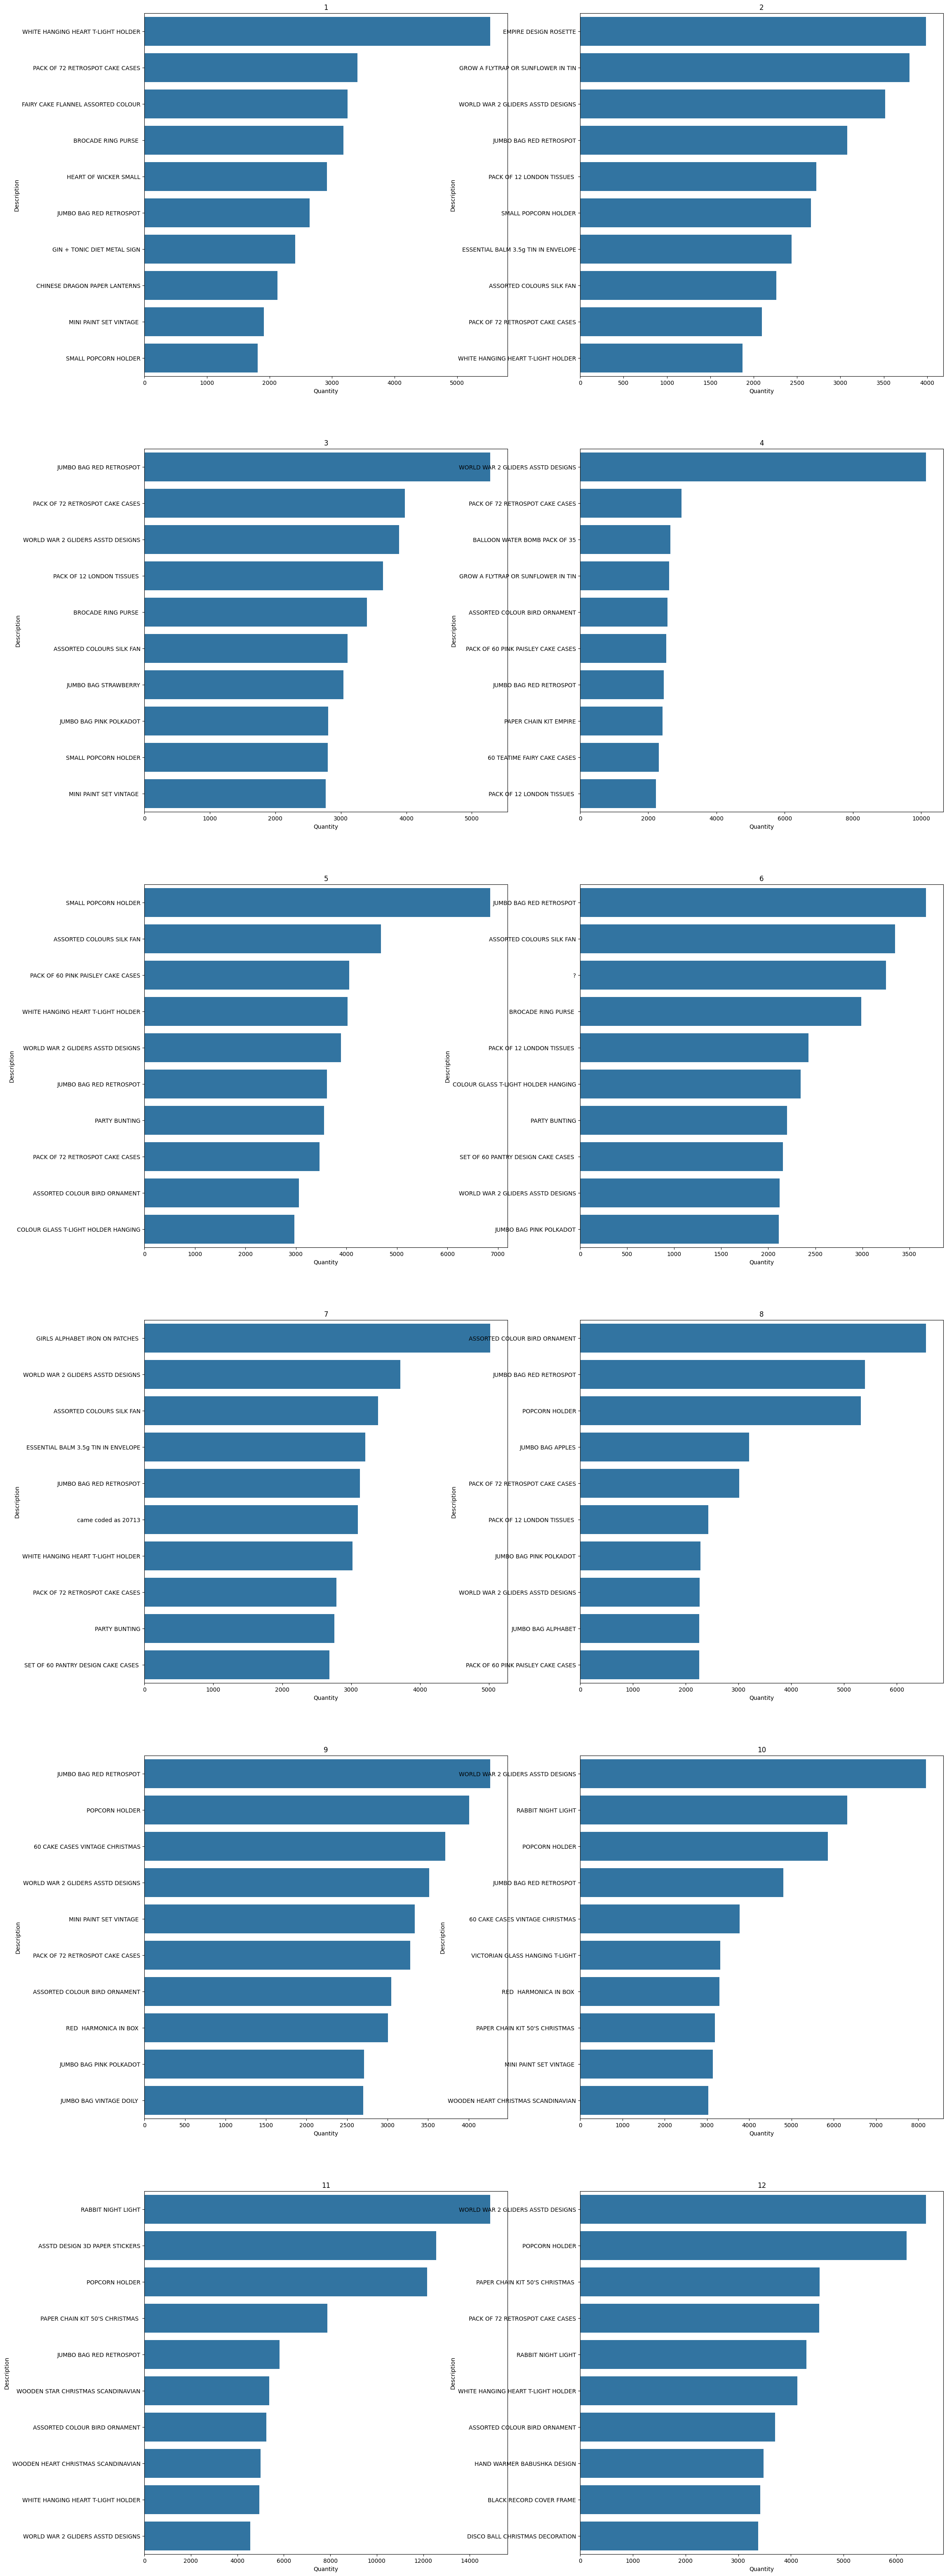

In [30]:
fig,axes=plt.subplots(nrows=6,ncols=2,figsize=(25,80))
for i in range(0,12):
    row=i//2
    col=i%2
    temp_df=top_products_monthly[top_products_monthly['Invoice_month']==i+1].sort_values(by='Quantity',ascending=False).head(10)
    sns.barplot(temp_df,x='Quantity',y='Description',ax=axes[row,col])
    axes[row,col].set_title(i+1)

## Each Month Analysis

In [31]:
df.groupby(by=['Invoice_month']).agg({'Quantity':'sum'}).reset_index()

,Invoice_month,Quantity
0,1,308966
1,2,277989
2,3,351872
3,4,289098
4,5,380391
5,6,341623
6,7,391116
7,8,406199
8,9,549817
9,10,570532


In [32]:
fig=px.line(df.groupby(by=['Invoice_month']).agg({'Quantity':'sum'}).reset_index(),x='Invoice_month',y='Quantity',title='Monthly sales')
fig.show()

## Findings: while doing the analysis, i discovered most of the sales was during November however, i wikk carry out more Analysis on the Hourly sales.

## HOURLY SALES ANALYSIS

In [33]:
df.groupby(by='Invoice_hour').agg({'Quantity':'sum'}).reset_index()
fig=px.bar(df.groupby(by='Invoice_hour').agg({'Quantity':'sum'}).reset_index(),x='Invoice_hour',y='Quantity',title='Hourly Sale')
fig.show()

## The bar chart shows that the buysiest hour of the day is between 10:00 and 15:00

In [34]:
Most_freq_cust=pd.DataFrame(df['CustomerID'].value_counts().head(10)).reset_index()
Most_freq_cust

,CustomerID,count
0,17841.0,7983
1,14911.0,5903
2,14096.0,5128
3,12748.0,4642
4,14606.0,2782
5,15311.0,2491
6,14646.0,2085
7,13089.0,1857
8,13263.0,1677
9,14298.0,1640


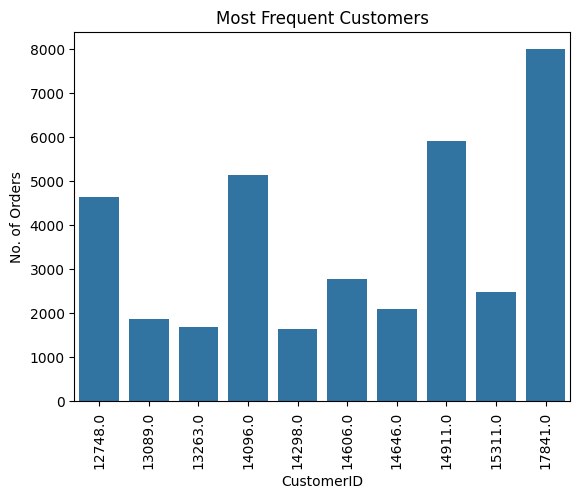

In [35]:
sns.barplot(Most_freq_cust,x='CustomerID',y='count')
plt.tick_params(axis='x',rotation=90)
plt.title('Most Frequent Customers')
plt.ylabel('No. of Orders')
plt.show()

In [36]:
df['Total_amount_paid']=df['Quantity']*df['UnitPrice']
top_customers=df[df['CustomerID'].isin(Most_freq_cust['CustomerID'])][['CustomerID','Country','Description','Quantity','Total_amount_paid']]
top_customers

,CustomerID,Country,Description,Quantity,Total_amount_paid
106,15311.0,United Kingdom,RETROSPOT TEA SET CERAMIC 11 PC,23,97.75
107,15311.0,United Kingdom,GIRLY PINK TOOL SET,5,24.75
108,15311.0,United Kingdom,JUMBO SHOPPER VINTAGE RED PAISLEY,10,19.50
109,15311.0,United Kingdom,"AIRLINE LOUNGE,METAL SIGN",2,4.20
110,15311.0,United Kingdom,WHITE SPOT RED CERAMIC DRAWER KNOB,6,7.50
...,...,...,...,...,...
541855,12748.0,United Kingdom,CINAMMON & ORANGE WREATH,1,6.75
541856,12748.0,United Kingdom,PINK REGENCY TEACUP AND SAUCER,1,2.95
541857,12748.0,United Kingdom,20 DOLLY PEGS RETROSPOT,1,1.45
541858,12748.0,United Kingdom,CHILLI LIGHTS,2,11.50


In [37]:
top_customers[['CustomerID','Country']].drop_duplicates() 

,CustomerID,Country
106,15311.0,United Kingdom
1016,12748.0,United Kingdom
1404,14911.0,EIRE
1441,17841.0,United Kingdom
2421,14606.0,United Kingdom
7440,13089.0,United Kingdom
29815,14298.0,United Kingdom
37952,14646.0,Netherlands
62628,13263.0,United Kingdom
317502,14096.0,United Kingdom


In [38]:
customer_Total_payments=df.groupby(by='CustomerID').agg({'Total_amount_paid':'sum'}).reset_index().sort_values(by='Total_amount_paid',ascending=False)
customer_Total_payments

,CustomerID,Total_amount_paid
1703,14646.0,279489.02
4233,18102.0,256438.49
3758,17450.0,187482.17
1895,14911.0,132572.62
55,12415.0,123725.45
...,...,...
125,12503.0,-1126.00
3870,17603.0,-1165.30
1384,14213.0,-1192.20
2236,15369.0,-1592.49


## total amount paid by each customer

In [39]:
Top_customer_total_payment=pd.merge(df[df['CustomerID'].isin(customer_Total_payments.head(10)['CustomerID'])][['CustomerID','Country']].drop_duplicates()
,customer_Total_payments.head(10),how='inner').sort_values(by='Total_amount_paid',ascending=False)
Top_customer_total_payment

,CustomerID,Country,Total_amount_paid
8,14646.0,Netherlands,279489.02
6,18102.0,United Kingdom,256438.49
5,17450.0,United Kingdom,187482.17
3,14911.0,EIRE,132572.62
9,12415.0,Australia,123725.45
4,14156.0,EIRE,113384.14
1,17511.0,United Kingdom,88125.38
7,16684.0,United Kingdom,65892.08
2,13694.0,United Kingdom,62653.10
0,15311.0,United Kingdom,59419.34


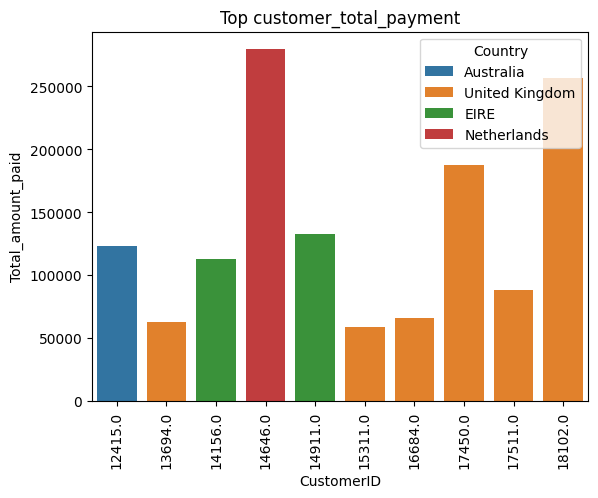

In [40]:
sns.barplot(Top_customer_total_payment,x='CustomerID',y='Total_amount_paid',hue='Country',dodge=False)
plt.tick_params(axis='x',rotation=90)
plt.title('Top customer_total_payment')
plt.show()

## CUSTOMERS PER EACH COUNTRY

In [41]:
pd.DataFrame(df['Country'].value_counts()).reset_index()

,Country,count
0,United Kingdom,495478
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,2002
8,Portugal,1519
9,Australia,1259


In [42]:
fig=px.bar(pd.DataFrame(df['Country'].value_counts()).reset_index(),y='Country',x='count')
fig.show()

## From the analysis so far, ataset Most of the Customers are from United kingdom

## Total paid by each customers

In [43]:
Total_amount_paid_per_country=df.groupby('Country').agg({'Total_amount_paid':'sum'}).reset_index()
Total_amount_paid_per_country

,Country,Total_amount_paid
0,Australia,137077.270
1,Austria,10154.320
2,Bahrain,548.400
3,Belgium,40910.960
4,Brazil,1143.600
5,Canada,3666.380
6,Channel Islands,20086.290
7,Cyprus,12946.290
8,Czech Republic,707.720
9,Denmark,18768.140


In [44]:
fig=px.bar(Total_amount_paid_per_country,x='Country',y='Total_amount_paid',title='Total amount paid per country ')
fig.show()

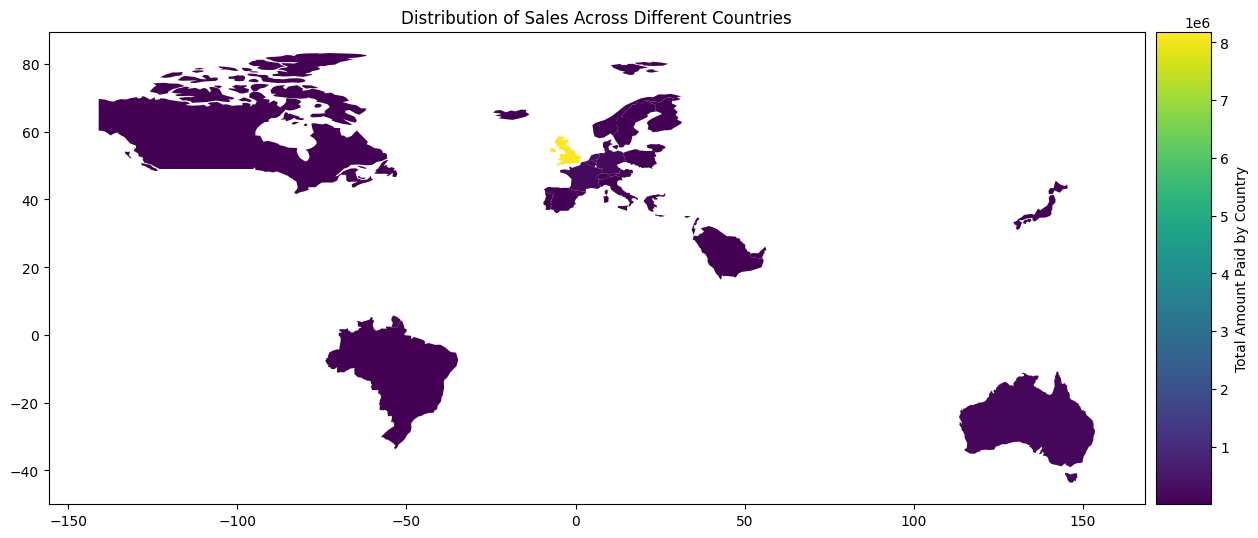

In [45]:
## GeoPandas provides a high-level interface to the matplotlib library for making maps.
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
country_sales = df.groupby('Country')['Total_amount_paid'].sum().reset_index()
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(country_sales, how='left', left_on='name', right_on='Country')


fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world.plot(column='Total_amount_paid', ax=ax, legend=True, cax=cax,legend_kwds={'label': "Total Amount Paid by Country"})
ax.set_title('Distribution of Sales Across Different Countries')
plt.show()

## Examine the correlation between numerical variables

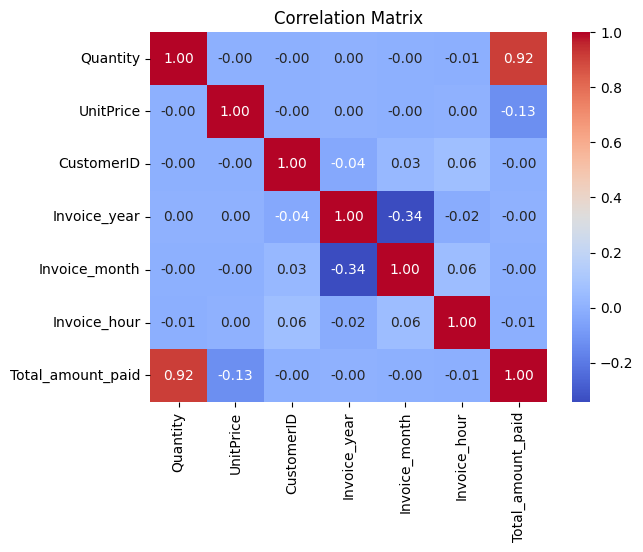

In [46]:
numeric_columns = df.select_dtypes(include=[np.number])
numeric_columns.dropna(inplace=True)
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()